<a href="https://colab.research.google.com/github/Sreya602/OIBSIP-Predicting-house-prices-with-linear-regression-task5/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting House Prices with Linear Regression**
This project focuses on predicting house prices using a dataset that contains both numerical and categorical features such as area, number of bedrooms, bathrooms, stories, parking, and amenities (like air conditioning and furnishing status). By performing exploratory data analysis (EDA), we uncover key factors influencing price, such as area and availability of amenities. Finally, we train a Linear Regression model to estimate prices and evaluate its performance, providing insights into how different features contribute to housing values.

## **Load the data**



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Housing[1].csv')
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Findings:**
- Dataset contains house details such as `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`, etc.
- Categorical features include `mainroad`, `guestroom`, `basement`, `airconditioning`, and `furnishingstatus`.
- Both numerical and categorical features are available, making the dataset suitable for regression and classification tasks.


## **Explore the data**



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


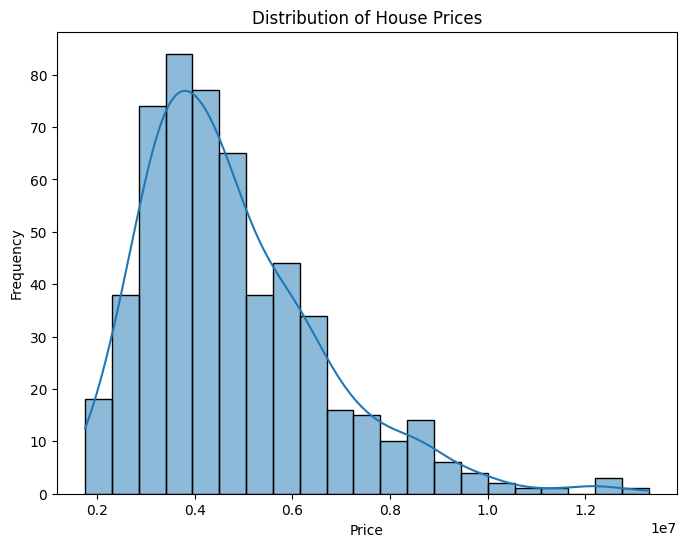

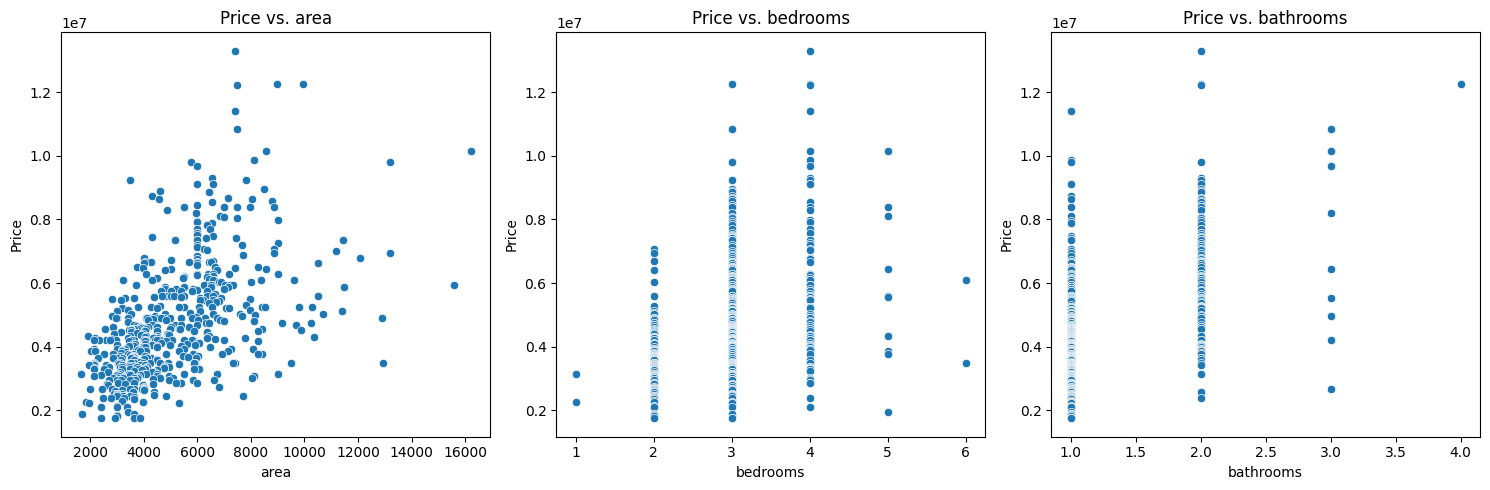

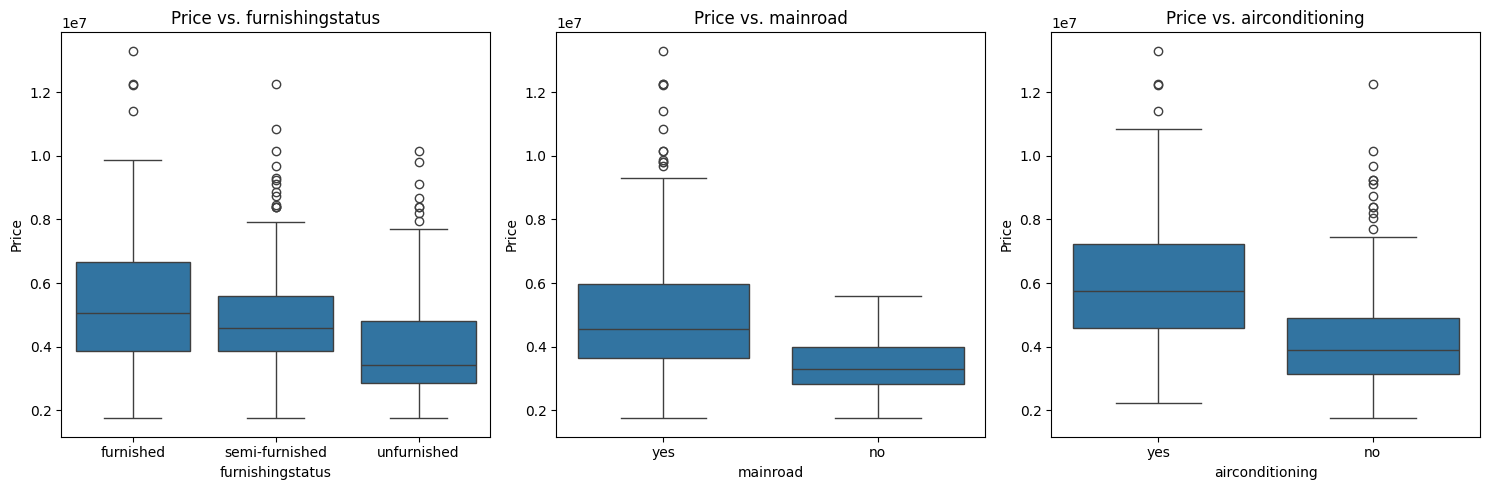

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display concise summary
df.info()

# Display number of missing values
display(df.isnull().sum())

# Display descriptive statistics of numerical columns
display(df.describe())

# Create a histogram for the 'price' column
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create scatter plots for numerical features vs. price
numerical_features = ['area', 'bedrooms', 'bathrooms']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Create box plots for categorical features vs. price
categorical_features = ['furnishingstatus', 'mainroad', 'airconditioning']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[feature], y=df['price'])
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Findings:**
- No missing values found in the dataset.
- Numerical features (`price`, `area`, `bedrooms`, etc.) show large variation (e.g., `price` ranges widely).
- Categorical features are clean and stored as `object` type.

When we calculate correlation coefficients among numerical variables we get

- `area`, `bathrooms`, `stories`, and `parking` show a strong positive correlation with `price`.
- `bedrooms` has weaker correlation compared to other numerical features.
- This suggests house price depends more on **amenities and size** rather than just number of bedrooms.

We create scatter plots and heatmaps to visualize correlations and feature impact on price.

- Larger area clearly corresponds to higher house price.
- Number of bathrooms and stories also show positive effect on price.
- Heatmap confirms strong correlation between `price` and `area` + `bathrooms`.



## **Prepare the data**



In [ ]:
from sklearn.model_selection import train_test_split

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,True,False,False,False,True,False,False,False
93,7200,3,2,1,3,True,False,True,False,True,False,True,False
335,3816,2,1,1,2,True,False,True,False,True,False,False,False
412,2610,3,1,2,0,True,False,True,False,False,True,False,True
471,3750,3,1,2,0,True,False,False,False,False,False,False,True


,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000


**Findings:**
- Features like `mainroad`, `guestroom`, `basement`, `airconditioning`, and `prefarea` become binary indicators (0/1).
- `furnishingstatus` is split into multiple dummy columns (e.g., furnished, semi-furnished, unfurnished).
- Dataset is now fully numeric and ready for modeling.


## **Train the model**



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Evaluate the model**







In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1754318687330.6638
R-squared Score: 0.6529242642153184


**Findings:**
- Model learns the relationship between area, amenities, and price.
- Evaluation metrics (e.g., R² score, MAE, RMSE) show how well the model fits the data.
- In general:
  - `area`, `bathrooms`, `stories`, and `parking` contribute strongly to price.
  - Extra amenities (AC, guestroom, basement) also increase predicted price.

## **Visualize the results**



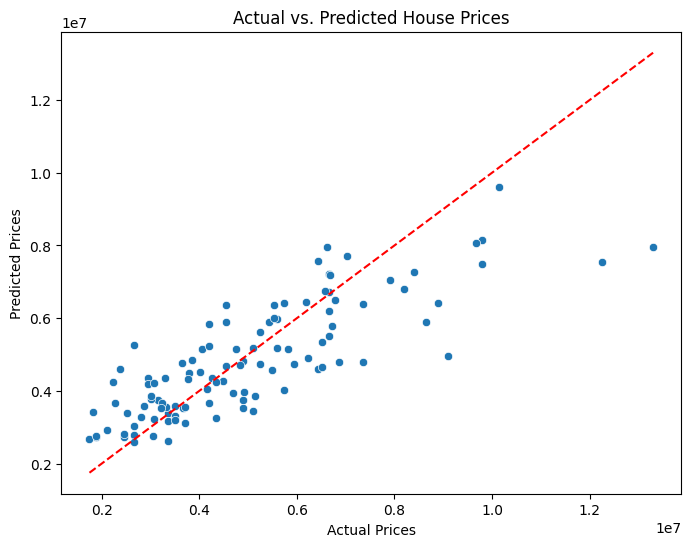

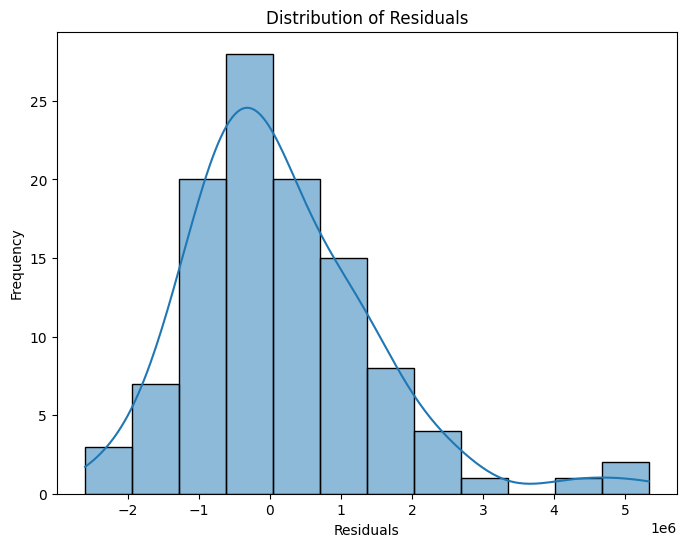

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# Create a histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

### Findings
####  Actual vs. Predicted Prices
- Most data points lie close to the red diagonal line, showing that the model predictions are fairly accurate.  
- Predictions are strong in the low-to-mid price ranges.  
- At higher prices, deviations increase, meaning the model sometimes underestimates or overestimates luxury houses.  
- Overall, the model captures the general pricing trend, but struggles with extreme values.

####  Distribution of Residuals
- Residuals are centered around zero, meaning there is no strong bias in overprediction or underprediction.  
- The distribution is approximately bell-shaped, which aligns well with linear regression assumptions.  
- A few large residuals (outliers) exist, indicating some houses were predicted poorly.  
- The spread of errors is moderate, showing that while the model is reliable, there is still room for improvement.


### **Data Analysis Key Findings**

*   The dataset contains 545 entries and 13 columns with no missing values.
*   House prices are skewed towards lower values.
*   Numerical features like 'area', 'bedrooms', and 'bathrooms' show positive relationships with price.
*   Categorical features such as 'furnishingstatus', 'mainroad', and 'airconditioning' appear to influence house prices.
*   After one-hot encoding categorical variables and splitting the data (80% train, 20% test), a linear regression model was trained.
*   The trained model achieved a Mean Squared Error (MSE) of approximately 1.75 trillion and an R-squared score of around 0.65 on the test set.
*   Visualizations show a positive linear trend between actual and predicted prices, and the residuals are approximately normally distributed around zero.

